Importing necessary packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing data

In [5]:
retail = pd.read_csv('Final\Customer_Segmentation.csv')
retail.head()

,TransactionID,Date,CustomerName,TotalItems,TotalCost,PaymentMethod,City,StoreType,DiscountApplied,Season,Promotion,Month,Year,CustomerID,CustomerCategory
0,1000000000,2022-01-21,Stacey Price,3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Winter,NaN,January,2022,380358,Homemaker
1,1000000001,2023-03-01,Michelle Carlson,2,25.93,Cash,San Francisco,Specialty Store,True,Fall,BOGO (Buy One Get One),March,2023,267659,Middle-aged
2,1000000002,2024-03-21,Lisa Graves,6,41.49,Credit Card,Houston,Department Store,True,Winter,NaN,March,2024,251581,Professional
3,1000000003,2020-10-31,Mrs. Patricia May,1,39.34,Mobile Payment,Chicago,Pharmacy,True,Spring,NaN,October,2020,130301,Student
4,1000000004,2020-12-10,Susan Mitchell,10,16.42,Debit Card,Houston,Specialty Store,False,Winter,Discount on Selected Items,December,2020,138235,Student


Exploring the dataset

In [6]:
retail.columns

Index(['TransactionID', 'Date', 'CustomerName', 'TotalItems', 'TotalCost',
       'PaymentMethod', 'City', 'StoreType', 'DiscountApplied', 'Season',
       'Promotion', 'Month', 'Year', 'CustomerID', 'CustomerCategory'],
      dtype='object')

In [7]:
retail.dtypes

TransactionID         int64
Date                 object
CustomerName         object
TotalItems            int64
TotalCost           float64
PaymentMethod        object
City                 object
StoreType            object
DiscountApplied        bool
Season               object
Promotion            object
Month                object
Year                  int64
CustomerID            int64
CustomerCategory     object
dtype: object

In [8]:
retail.isnull().sum()

TransactionID            0
Date                     0
CustomerName             0
TotalItems               0
TotalCost                0
PaymentMethod            0
City                     0
StoreType                0
DiscountApplied          0
Season                   0
Promotion           333943
Month                    0
Year                     0
CustomerID               0
CustomerCategory         0
dtype: int64

In [9]:
retail['Date'] = pd.to_datetime(retail['Date']).dt.date

In [10]:
retail.dtypes

TransactionID         int64
Date                 object
CustomerName         object
TotalItems            int64
TotalCost           float64
PaymentMethod        object
City                 object
StoreType            object
DiscountApplied        bool
Season               object
Promotion            object
Month                object
Year                  int64
CustomerID            int64
CustomerCategory     object
dtype: object

In [11]:
retail.columns= retail.columns.str.replace("_", "")

In [12]:
retail.head()

,TransactionID,Date,CustomerName,TotalItems,TotalCost,PaymentMethod,City,StoreType,DiscountApplied,Season,Promotion,Month,Year,CustomerID,CustomerCategory
0,1000000000,2022-01-21,Stacey Price,3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Winter,NaN,January,2022,380358,Homemaker
1,1000000001,2023-03-01,Michelle Carlson,2,25.93,Cash,San Francisco,Specialty Store,True,Fall,BOGO (Buy One Get One),March,2023,267659,Middle-aged
2,1000000002,2024-03-21,Lisa Graves,6,41.49,Credit Card,Houston,Department Store,True,Winter,NaN,March,2024,251581,Professional
3,1000000003,2020-10-31,Mrs. Patricia May,1,39.34,Mobile Payment,Chicago,Pharmacy,True,Spring,NaN,October,2020,130301,Student
4,1000000004,2020-12-10,Susan Mitchell,10,16.42,Debit Card,Houston,Specialty Store,False,Winter,Discount on Selected Items,December,2020,138235,Student


Creating New year and month column

In [13]:
retail['Month'] = pd.to_datetime(retail['Date']).dt.month_name()

In [14]:
retail['Year'] = pd.to_datetime(retail['Date']).dt.year

In [15]:
import calendar

In [16]:
retail.head()

,TransactionID,Date,CustomerName,TotalItems,TotalCost,PaymentMethod,City,StoreType,DiscountApplied,Season,Promotion,Month,Year,CustomerID,CustomerCategory
0,1000000000,2022-01-21,Stacey Price,3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Winter,NaN,January,2022,380358,Homemaker
1,1000000001,2023-03-01,Michelle Carlson,2,25.93,Cash,San Francisco,Specialty Store,True,Fall,BOGO (Buy One Get One),March,2023,267659,Middle-aged
2,1000000002,2024-03-21,Lisa Graves,6,41.49,Credit Card,Houston,Department Store,True,Winter,NaN,March,2024,251581,Professional
3,1000000003,2020-10-31,Mrs. Patricia May,1,39.34,Mobile Payment,Chicago,Pharmacy,True,Spring,NaN,October,2020,130301,Student
4,1000000004,2020-12-10,Susan Mitchell,10,16.42,Debit Card,Houston,Specialty Store,False,Winter,Discount on Selected Items,December,2020,138235,Student


In [17]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   TransactionID     1000000 non-null  int64  
 1   Date              1000000 non-null  object 
 2   CustomerName      1000000 non-null  object 
 3   TotalItems        1000000 non-null  int64  
 4   TotalCost         1000000 non-null  float64
 5   PaymentMethod     1000000 non-null  object 
 6   City              1000000 non-null  object 
 7   StoreType         1000000 non-null  object 
 8   DiscountApplied   1000000 non-null  bool   
 9   Season            1000000 non-null  object 
 10  Promotion         666057 non-null   object 
 11  Month             1000000 non-null  object 
 12  Year              1000000 non-null  int32  
 13  CustomerID        1000000 non-null  int64  
 14  CustomerCategory  1000000 non-null  object 
dtypes: bool(1), float64(1), int32(1), int64(3), object

In [18]:
retail.shape

(1000000, 15)

In [19]:
retail['TotalCost'].describe()

count    1000000.000000
mean          52.455220
std           27.416989
min            5.000000
25%           28.710000
50%           52.420000
75%           76.190000
max          100.000000
Name: TotalCost, dtype: float64

In [20]:
retail['StoreType'].describe()

count         1000000
unique              6
top       Supermarket
freq           166936
Name: StoreType, dtype: object

Highest number of customers purchase from supermarket.

In [21]:
retail['StoreType'].value_counts()

StoreType
Supermarket          166936
Pharmacy             166915
Convenience Store    166749
Warehouse Club       166685
Department Store     166614
Specialty Store      166101
Name: count, dtype: int64

In [22]:
retail['TotalItems'].value_counts()

TotalItems
2     100444
5     100284
1     100097
6     100039
7     100027
8     100004
4      99962
3      99806
10     99782
9      99555
Name: count, dtype: int64

In [23]:
retail['PaymentMethod'].value_counts()

PaymentMethod
Cash              250230
Debit Card        250074
Credit Card       249985
Mobile Payment    249711
Name: count, dtype: int64

In [24]:
retail['City'].value_counts()

City
Boston           100566
Dallas           100559
Seattle          100167
Chicago          100059
Houston          100050
New York         100007
Los Angeles       99879
Miami             99839
San Francisco     99808
Atlanta           99066
Name: count, dtype: int64

In [25]:
retail[['City', 'StoreType']].value_counts()

City           StoreType        
Seattle        Warehouse Club       17074
Boston         Department Store     17041
Dallas         Supermarket          16906
Boston         Pharmacy             16878
New York       Supermarket          16869
Chicago        Convenience Store    16861
Miami          Pharmacy             16859
Dallas         Department Store     16857
Houston        Convenience Store    16846
Chicago        Specialty Store      16816
San Francisco  Department Store     16806
Los Angeles    Convenience Store    16799
Houston        Specialty Store      16793
Seattle        Supermarket          16772
Boston         Supermarket          16765
Chicago        Supermarket          16747
Dallas         Warehouse Club       16735
Houston        Pharmacy             16734
Dallas         Convenience Store    16724
               Pharmacy             16724
San Francisco  Pharmacy             16723
Boston         Specialty Store      16721
Seattle        Convenience Store    16710
B

In [26]:
retail[['CustomerCategory', 'StoreType']].value_counts()

CustomerCategory  StoreType        
Young-Adult       Warehouse Club       37063
                  Department Store     36987
                  Pharmacy             36917
                  Specialty Store      36741
                  Convenience Store    36698
                  Supermarket          36684
Homemaker         Convenience Store    35186
                  Supermarket          35180
                  Pharmacy             35054
                  Department Store     34940
                  Warehouse Club       34705
                  Specialty Store      34683
Student           Pharmacy             29600
                  Specialty Store      29554
                  Convenience Store    29488
                  Supermarket          29474
                  Warehouse Club       29457
                  Department Store     29246
Teenager          Supermarket          25637
                  Convenience Store    25495
                  Warehouse Club       25487
                  D

In [27]:
retail['DiscountApplied'].value_counts()

DiscountApplied
True     500104
False    499896
Name: count, dtype: int64

Nearly half the population of consumer got the discounts for their purchase.

In [28]:
retail['Season'].value_counts()

Season
Spring    250368
Fall      250248
Winter    249763
Summer    249621
Name: count, dtype: int64

Highest number of purchases happens in spring season.

In [29]:
retail['Promotion'].value_counts()

Promotion
Discount on Selected Items    333370
BOGO (Buy One Get One)        332687
Name: count, dtype: int64

In [30]:
retail[['DiscountApplied', 'Promotion']].value_counts()

DiscountApplied  Promotion                 
True             Discount on Selected Items    166866
False            Discount on Selected Items    166504
True             BOGO (Buy One Get One)        166479
False            BOGO (Buy One Get One)        166208
Name: count, dtype: int64

In [31]:
retail[['CustomerName']].value_counts()

CustomerName    
Michael Smith       454
Michael Johnson     341
James Smith         337
David Smith         309
Michael Williams    304
                   ... 
Jasmine Clayton       1
Jasmine Cline         1
Jasmine Coffey        1
Jasmine Colon         1
Zoe York              1
Name: count, Length: 329738, dtype: int64

Michael Smith purchased products highest number of times from the shop followed by Michael Johnson.

In [32]:
retail[['Date']].value_counts()

Date      
2022-06-07    706
2021-03-21    696
2024-02-02    694
2021-03-03    694
2021-01-04    694
             ... 
2022-05-29    551
2023-04-29    551
2020-10-13    545
2023-08-08    538
2024-05-18    524
Name: count, Length: 1600, dtype: int64

In [33]:
retail[['Year']].value_counts()

Year
2020    228707
2023    228474
2021    228298
2022    227818
2024     86703
Name: count, dtype: int64

In [34]:
retail[['Month']].value_counts()

Month    
March        97278
January      97002
April        93650
February     88704
May          88356
July         77826
December     77331
October      77191
August       77114
November     75493
June         75217
September    74838
Name: count, dtype: int64

Highest number of customers visit the store in the month of March and least number of customer reach the store in September.

In [35]:
retail[['CustomerName', 'DiscountApplied']].value_counts()

CustomerName       DiscountApplied
Michael Smith      False              228
                   True               226
Michael Johnson    True               184
James Smith        True               170
                   False              167
                                     ... 
Jacob Shepard      False                1
Jacob Shelton Jr.  True                 1
Jacob Shannon      True                 1
Jacob Shaffer      True                 1
Zoe York           False                1
Name: count, Length: 442666, dtype: int64

In [36]:
retail[['CustomerName', 'Promotion']].value_counts()

CustomerName        Promotion                 
Michael Smith       BOGO (Buy One Get One)        158
                    Discount on Selected Items    135
Michael Johnson     BOGO (Buy One Get One)        119
James Smith         BOGO (Buy One Get One)        116
Michael Williams    Discount on Selected Items    113
                                                 ... 
Isabella Carrillo   BOGO (Buy One Get One)          1
Isabella Carter     Discount on Selected Items      1
Isabella Christian  Discount on Selected Items      1
Isabella Cisneros   Discount on Selected Items      1
Zoe York            BOGO (Buy One Get One)          1
Name: count, Length: 341116, dtype: int64

In [37]:
Sales = retail.groupby(['CustomerID','CustomerName'], as_index = False).agg(TotalAmountSpend = ('TotalCost', 'sum'))
Sales = Sales.sort_values(by=['TotalAmountSpend'],ascending=False)
Sales

,CustomerID,CustomerName,TotalAmountSpend
170604,206954,Michael Smith,23768.53
32323,39382,James Smith,18464.04
42114,51219,Michael Johnson,18032.17
301925,366356,Christopher Smith,17006.64
34766,42299,David Smith,16547.27
...,...,...,...
140316,170223,Clifford Stone,5.00
257733,312768,Jane Grant,5.00
202819,246239,Abigail Petersen,5.00
74922,91103,Dr. Jennifer Sherman DDS,5.00


Michael Smith spent the highest amount of money in purchasing followed by James Smith.

In [38]:
SalesByStore = retail.groupby(['StoreType'], as_index = False).agg(SalesAmount = ('TotalCost', 'sum'))
SalesByStore = SalesByStore.sort_values(by=['SalesAmount'],ascending=False)
SalesByStore

,StoreType,SalesAmount
2,Pharmacy,8766679.01
4,Supermarket,8763455.21
5,Warehouse Club,8760029.03
0,Convenience Store,8731901.36
1,Department Store,8731555.57
3,Specialty Store,8701600.22


Text(0.5, 1.0, 'Total Sales by Store Type')

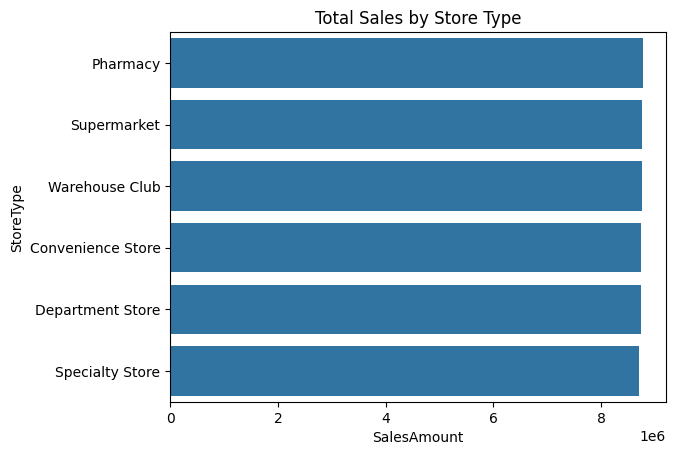

In [39]:
sns.barplot(data= SalesByStore, y= "StoreType", x= "SalesAmount")
plt.title('Total Sales by Store Type')

Pharmacy produce highest sales.

Text(0.5, 1.0, 'Total Number of Customer visits by store type')

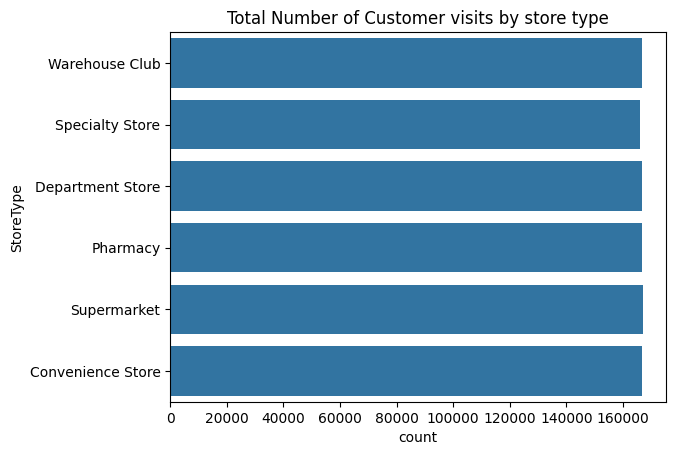

In [40]:
sns.countplot(y= "StoreType", data = retail)
plt.title("Total Number of Customer visits by store type")

In [41]:
Payment = retail.groupby(['PaymentMethod'], as_index = False).agg(TotalPayment = ('TotalCost', 'sum'))
Payment =Payment.sort_values(by = ['TotalPayment'], ascending = False)
Payment

,PaymentMethod,TotalPayment
0,Cash,13133235.30
1,Credit Card,13123764.94
3,Mobile Payment,13103003.92
2,Debit Card,13095216.24


Text(0.5, 1.0, 'Number of Transactions by Payment Method')

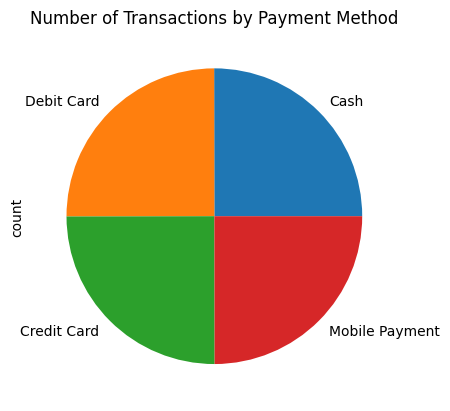

In [42]:
retail["PaymentMethod"].value_counts().plot(kind='pie')
plt.title('Number of Transactions by Payment Method')

Text(0.5, 1.0, 'Total Payment by Payment Method')

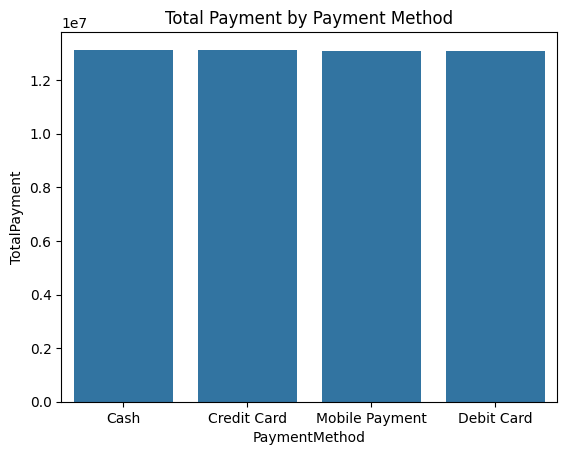

In [43]:
sns.barplot(data= Payment, y= "TotalPayment", x= "PaymentMethod")
plt.title('Total Payment by Payment Method')

Text(0.5, 1.0, 'Number Of Transactions by Payment Method')

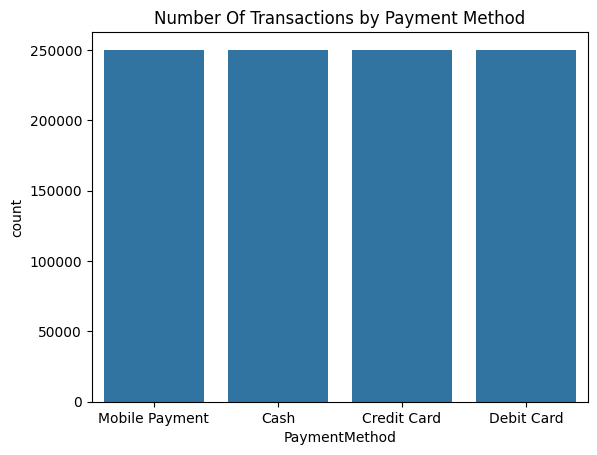

In [44]:
sns.countplot(x= "PaymentMethod", data = retail)
plt.title("Number Of Transactions by Payment Method")

In [45]:
YearlySales = retail.groupby(['Year'], as_index = False).agg(TotalSales = ('TotalCost', 'sum'))
YearlySales = YearlySales.sort_values(by = ['TotalSales'], ascending = False)
YearlySales

,Year,TotalSales
0,2020,12015550.55
3,2023,11983528.18
1,2021,11968910.92
2,2022,11947032.90
4,2024,4540197.85


Text(0.5, 1.0, 'Total Sales By Year')

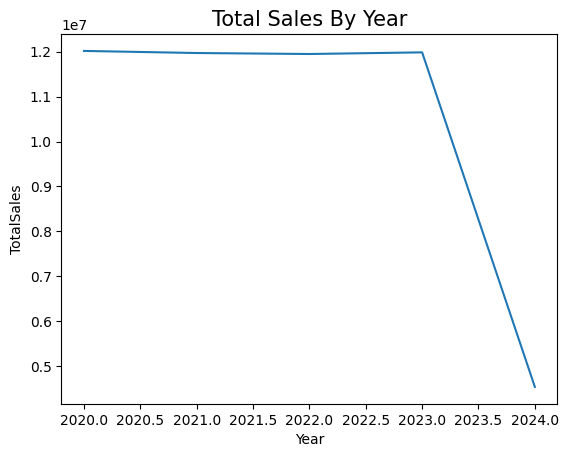

In [46]:
sns.lineplot(data=YearlySales, x= 'Year', y= 'TotalSales')
plt.title("Total Sales By Year", size=15)

Highest income is generated in 2022 followed by 2023.

In [47]:
MonthlySales = retail.groupby(['Month'], as_index = False).agg(TotalSales = ('TotalCost', 'sum'))
MonthlySales = MonthlySales.sort_values(by = ['TotalSales'], ascending = False)
MonthlySales

,Month,TotalSales
7,March,5107241.39
4,January,5084254.53
0,April,4910197.48
3,February,4647868.43
8,May,4635343.86
5,July,4080316.99
10,October,4059864.04
1,August,4054702.57
2,December,4046791.79
9,November,3963433.04


Text(0.5, 1.0, 'Total Sales By Month')

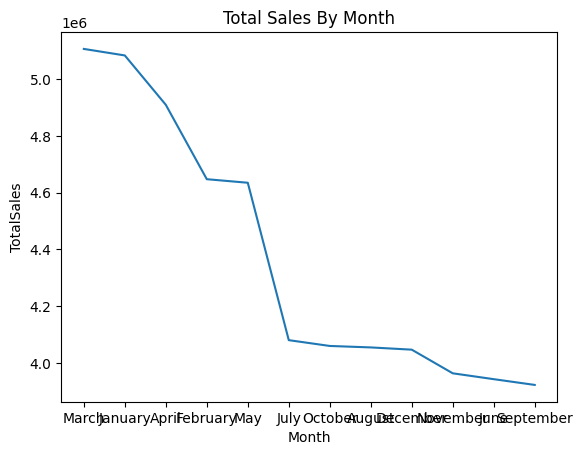

In [48]:
sns.lineplot(data=MonthlySales, x= 'Month', y= 'TotalSales')
plt.title("Total Sales By Month")

As the number of customer visits is highest in March the revenue is also the highest whereas the september monthly revenue is the lowest as the customer visits are the least. 

In [49]:
SeasonSales = retail.groupby(['Season', 'StoreType'], as_index = False).agg(TotalSales = ('TotalCost', 'sum'))
SeasonSales = SeasonSales.sort_values(by = ['Season'])
SeasonSales

,Season,StoreType,TotalSales
0,Fall,Convenience Store,2181716.31
1,Fall,Department Store,2182956.07
2,Fall,Pharmacy,2197176.21
3,Fall,Specialty Store,2173242.47
4,Fall,Supermarket,2183625.58
5,Fall,Warehouse Club,2218197.07
10,Spring,Supermarket,2191152.99
9,Spring,Specialty Store,2172885.60
11,Spring,Warehouse Club,2189582.38
7,Spring,Department Store,2176207.25


Text(0.5, 1.0, 'Total Sales by Store Type and Season')

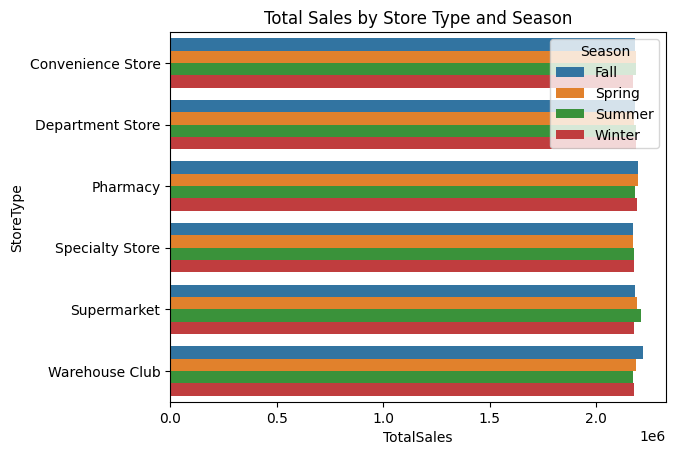

In [50]:
sns.barplot(data= SeasonSales, x= "TotalSales", y= "StoreType", hue ='Season')
plt.title('Total Sales by Store Type and Season')

In [51]:
TotalProductsBought = retail.groupby(['CustomerName'], as_index = False).agg(TotalProducts = ('TotalItems', 'sum'))
TotalProductsBought = TotalProductsBought.sort_values(by = ['TotalProducts'], ascending =False)
TotalProductsBought

,CustomerName,TotalProducts
221493,Michael Smith,2516
220934,Michael Johnson,1908
135511,James Smith,1794
81402,David Smith,1708
221663,Michael Williams,1678
...,...,...
136155,Jamie Madden,1
235420,Mr. Thomas Compton Jr.,1
53457,Cassandra Ramsey,1
315855,Trevor Silva,1


In [52]:
Top10Customers = TotalProductsBought.head(10)
Top10Customers

,CustomerName,TotalProducts
221493,Michael Smith,2516
220934,Michael Johnson,1908
135511,James Smith,1794
81402,David Smith,1708
221663,Michael Williams,1678
63727,Christopher Smith,1606
155835,John Smith,1591
80915,David Johnson,1579
220435,Michael Brown,1572
220942,Michael Jones,1569


Text(0.5, 1.0, 'Top 10 Customers by Products bought')

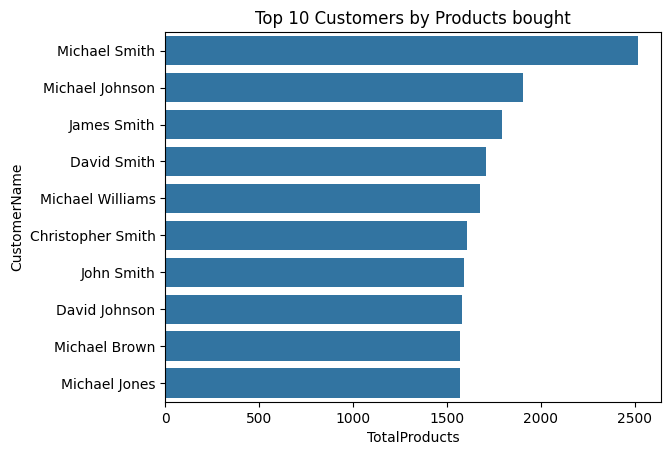

In [53]:
sns.barplot(data= Top10Customers, x= "TotalProducts", y= "CustomerName")
plt.title('Top 10 Customers by Products bought')

Michael Smith bought the highest number of products.

In [54]:
TotalVisit = retail.groupby(['CustomerName'], as_index = False).agg(NumberOfVisits = ('TransactionID', 'count'))
TotalVisit = TotalVisit.sort_values(by = ['NumberOfVisits'], ascending =False)
TotalVisit

,CustomerName,NumberOfVisits
221493,Michael Smith,454
220934,Michael Johnson,341
135511,James Smith,337
81402,David Smith,309
221663,Michael Williams,304
...,...,...
138660,Jasmine Clayton,1
138661,Jasmine Cline,1
138663,Jasmine Coffey,1
138667,Jasmine Colon,1


In [55]:
MostVisitingCustomers = TotalVisit.head(10)
MostVisitingCustomers

,CustomerName,NumberOfVisits
221493,Michael Smith,454
220934,Michael Johnson,341
135511,James Smith,337
81402,David Smith,309
221663,Michael Williams,304
63727,Christopher Smith,301
155835,John Smith,288
220942,Michael Jones,285
268244,Robert Smith,275
220435,Michael Brown,274


Text(0.5, 1.0, 'Top 10 Customers by Total Visits')

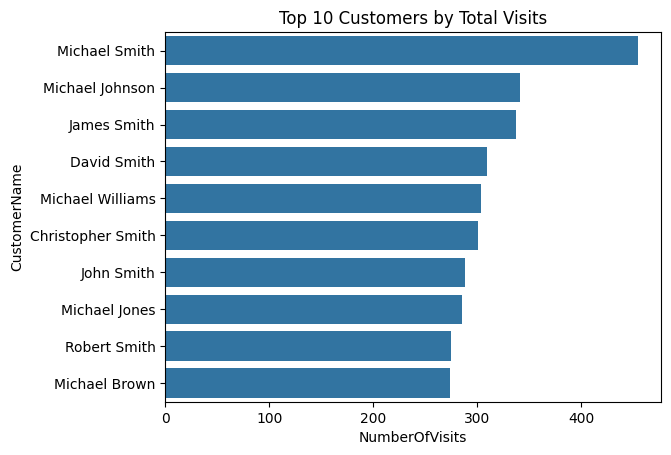

In [56]:
sns.barplot(data= MostVisitingCustomers, x= "NumberOfVisits", y= "CustomerName")
plt.title('Top 10 Customers by Total Visits')

In [57]:
YearlyVisit = retail.groupby(['CustomerName', 'Year'], as_index = False).agg(NumberOfVisits = ('TransactionID', 'count'))
YearlyVisit = YearlyVisit.sort_values(by = ['NumberOfVisits'], ascending =False)
YearlyVisit

,CustomerName,Year,NumberOfVisits
403196,Michael Smith,2022,108
403197,Michael Smith,2023,105
403195,Michael Smith,2021,103
403194,Michael Smith,2020,96
401340,Michael Johnson,2020,84
...,...,...,...
224032,Holly Arnold,2021,1
224031,Holly Arnold,2020,1
224030,Holly Andrews,2023,1
224029,Holly Andrews,2021,1


In [58]:
YearsVisited = YearlyVisit.groupby(['CustomerName'], as_index = False).agg(NumberOfYearsVisits = ('Year', 'count'))
YearsVisited  = YearsVisited.sort_values(by = ['NumberOfYearsVisits'], ascending =False)
YearsVisited 

,CustomerName,NumberOfYearsVisits
155799,John Schultz,5
155873,John Sullivan,5
80946,David Kim,5
155845,John Soto,5
155849,John Spencer,5
...,...,...
134978,James Hopkins MD,1
134980,James Horn Jr.,1
134986,James Howard II,1
134987,James Howard Jr.,1


In [59]:
NumberOfCustomerVisited = YearsVisited.groupby(['NumberOfYearsVisits'], as_index = False).agg(NumberOfCustomers = ('CustomerName', 'count'))
NumberOfCustomerVisited  = NumberOfCustomerVisited.sort_values(by = ['NumberOfCustomers'], ascending =False)
NumberOfCustomerVisited

,NumberOfYearsVisits,NumberOfCustomers
0,1,191253
1,2,66972
2,3,34783
3,4,21576
4,5,15154


Highest number of the customer started to purchase from the store just within a year ago.

Text(0.5, 1.0, 'Number of visits by year ')

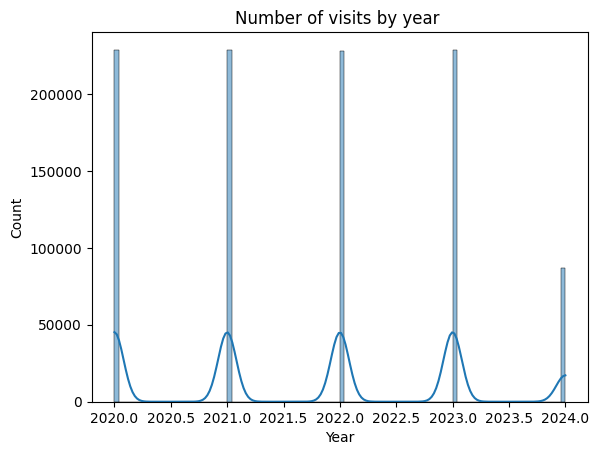

In [60]:
sns.histplot(retail["Year"],kde=True)
plt.title("Number of visits by year ")

In [61]:
MonthlyVisit = retail.groupby(['CustomerName','Month'], as_index = False).agg(NumberOfVisits = ('TransactionID', 'count'))
MonthlyVisit = MonthlyVisit.sort_values(by = ['NumberOfVisits'], ascending =False)
MonthlyVisit

,CustomerName,Month,NumberOfVisits
505561,Michael Smith,April,48
505568,Michael Smith,March,48
505566,Michael Smith,July,46
505564,Michael Smith,February,44
505565,Michael Smith,January,43
...,...,...,...
266260,Hannah Ford,July,1
266261,Hannah Ford,May,1
266262,Hannah Foster,April,1
266263,Hannah Foster,February,1


In [62]:
MonthsVisited = MonthlyVisit.groupby(['CustomerName'], as_index = False).agg(MonthsVisited = ('NumberOfVisits', 'count'))
MonthsVisited = MonthsVisited.sort_values(by = ['MonthsVisited'], ascending =False)
MonthsVisited

,CustomerName,MonthsVisited
191633,Laura Taylor,12
218568,Melissa Evans,12
63547,Christopher Payne,12
38757,Brenda Smith,12
309793,Tina Brown,12
...,...,...
137607,Janice Hopkins,1
137608,Janice Howard,1
137612,Janice Hunter,1
137616,Janice James,1


In [63]:
CustomersVisitsMonthly = MonthsVisited .groupby(['MonthsVisited'], as_index = False).agg( NumberOfCustomers= ('CustomerName', 'count'))
CustomersVisitsMonthly = CustomersVisitsMonthly.sort_values(by = ['NumberOfCustomers'], ascending =False)
CustomersVisitsMonthly

,MonthsVisited,NumberOfCustomers
0,1,182014
1,2,61568
2,3,30743
3,4,17898
4,5,11137
5,6,7770
6,7,5372
7,8,3998
8,9,2916
9,10,2268


Most of the customers had purchased only one month a year from the shop

Text(0.5, 1.0, 'Number of visits by month')

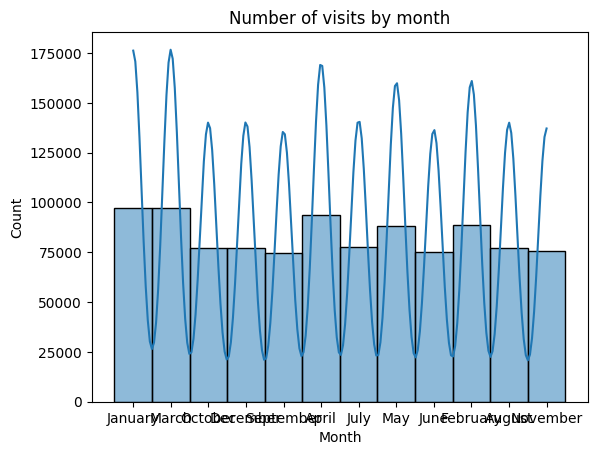

In [64]:
sns.histplot(retail["Month"],kde=True)
plt.title("Number of visits by month")

In [65]:
SeasonalVisit = retail.groupby(['CustomerName', 'Season'], as_index = False).agg(NumberOfVisits = ('TransactionID', 'count'))
SeasonalVisit = SeasonalVisit.sort_values(by = ['NumberOfVisits'], ascending =False)
SeasonalVisit

,CustomerName,Season,NumberOfVisits
382708,Michael Smith,Spring,118
382707,Michael Smith,Fall,117
382709,Michael Smith,Summer,113
382710,Michael Smith,Winter,106
381105,Michael Johnson,Summer,92
...,...,...,...
215116,Howard Travis,Fall,1
215115,Howard Tran,Summer,1
215114,Howard Torres,Summer,1
215111,Howard Thompson,Fall,1


In [66]:
SeasonsVisited = SeasonalVisit.groupby(['CustomerName'], as_index = False).agg(NumberOfSeasonsVisited = ('Season', 'count'))
SeasonsVisited = SeasonsVisited.sort_values(by = ['NumberOfSeasonsVisited'], ascending =False)
SeasonsVisited

,CustomerName,NumberOfSeasonsVisited
267461,Robert Decker,4
26384,Ashley Robertson,4
183201,Kimberly Reed,4
296453,Steven Phillips,4
26380,Ashley Robbins,4
...,...,...
134079,Jaime Maxwell,1
134080,Jaime May,1
134081,Jaime Mcbride,1
134082,Jaime Mcclure,1


In [67]:
NumberOfSeasonsVisited = SeasonsVisited.groupby(['NumberOfSeasonsVisited'], as_index = False).agg(NumberOfCustomerVisited = ('CustomerName', 'count'))
NumberOfSeasonsVisited = NumberOfSeasonsVisited.sort_values(by = ['NumberOfCustomerVisited'], ascending =False)
NumberOfSeasonsVisited

,NumberOfSeasonsVisited,NumberOfCustomerVisited
0,1,193816
1,2,69177
2,3,36761
3,4,29984


In [68]:
CityVisit = retail.groupby(['CustomerName', 'City'], as_index = False).agg(NumberOfVisits = ('TransactionID', 'count'))
CityVisit = CityVisit.sort_values(by = ['NumberOfVisits'], ascending =False)
CityVisit

,CustomerName,City,NumberOfVisits
487364,Michael Smith,San Francisco,55
487363,Michael Smith,New York,52
487356,Michael Smith,Atlanta,52
487365,Michael Smith,Seattle,50
487362,Michael Smith,Miami,46
...,...,...,...
258824,Hannah Williamson,Houston,1
258825,Hannah Williamson,Miami,1
258827,Hannah Wilson,Dallas,1
258832,Hannah Wilson,Seattle,1


In [69]:
CityStoreVisited = CityVisit.groupby(['CustomerName'], as_index = False).agg(NumberOfCityStoreVisited = ('City', 'count'))
CityStoreVisited = CityStoreVisited.sort_values(by = ['NumberOfCityStoreVisited'], ascending =False)
CityStoreVisited

,CustomerName,NumberOfCityStoreVisited
36500,Brandon Garcia,10
293565,Stephanie Flores,10
221197,Michael Murphy,10
104904,Elizabeth Gomez,10
267972,Robert Morris,10
...,...,...
137252,Janet Page,1
137253,Janet Palmer,1
137255,Janet Parks,1
137256,Janet Patel,1


In [70]:
NumberOfCityStoreVisited = CityStoreVisited.groupby(['NumberOfCityStoreVisited'], as_index = False).agg(NumberOfCustomersVisited = ('CustomerName', 'count'))
NumberOfCityStoreVisited = NumberOfCityStoreVisited.sort_values(by = ['NumberOfCustomersVisited'], ascending =False)
NumberOfCityStoreVisited

,NumberOfCityStoreVisited,NumberOfCustomersVisited
0,1,183181
1,2,62013
2,3,31139
3,4,17944
4,5,11486
5,6,7807
6,7,5408
7,8,4034
9,10,3567
8,9,3159


Text(0.5, 1.0, 'Number of Visits by City')

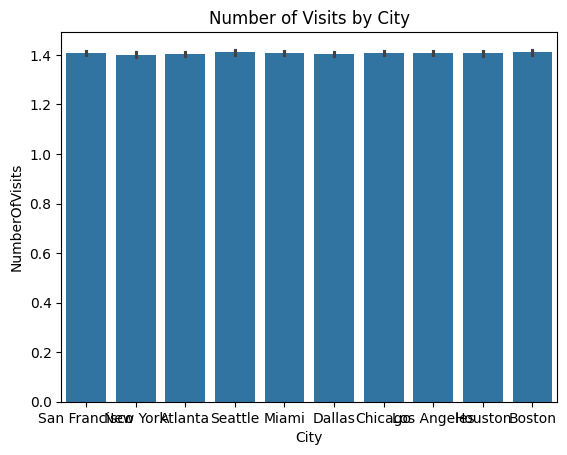

In [71]:
sns.barplot(data= CityVisit, y= "NumberOfVisits", x= "City")
plt.title('Number of Visits by City')

In [72]:
StoreVisit = retail.groupby(['CustomerName', 'StoreType'], as_index = False).agg(NumberOfVisits = ('TransactionID', 'count'))
StoreVisit = StoreVisit.sort_values(by = ['NumberOfVisits'], ascending =False)
StoreVisit

,CustomerName,StoreType,NumberOfVisits
431010,Michael Smith,Supermarket,84
431006,Michael Smith,Convenience Store,82
431011,Michael Smith,Warehouse Club,78
431009,Michael Smith,Specialty Store,75
428836,Michael Johnson,Department Store,74
...,...,...,...
235934,Hector Payne,Department Store,1
235933,Hector Patterson,Warehouse Club,1
235932,Hector Patel,Supermarket,1
235931,Hector Parks,Pharmacy,1


In [73]:
VisitsAndDiscounts = retail.groupby(['CustomerName', 'DiscountApplied'], as_index = False).agg(NumberOfDiscounts = ('TransactionID', 'count'))
VisitsAndDiscounts = VisitsAndDiscounts.sort_values(by = ['NumberOfDiscounts'], ascending =False)
VisitsAndDiscounts

,CustomerName,DiscountApplied,NumberOfDiscounts
299535,Michael Smith,False,228
299536,Michael Smith,True,226
298589,Michael Johnson,True,184
180269,James Smith,True,170
180268,James Smith,False,167
...,...,...,...
176164,Jacob Shepard,False,1
176163,Jacob Shelton Jr.,True,1
176156,Jacob Shannon,True,1
176154,Jacob Shaffer,True,1


In [74]:
DiscountsApplied= retail.groupby(['CustomerName', 'DiscountApplied'], as_index = False).agg(NumberOfDiscounts = ('TransactionID', 'count'))
DiscountsApplied = DiscountsApplied.sort_values(by = ['NumberOfDiscounts'], ascending =False)
DiscountsApplied= DiscountsApplied.drop(DiscountsApplied[DiscountsApplied['DiscountApplied']== False].index)
DiscountsApplied = DiscountsApplied[['CustomerName', "NumberOfDiscounts"]]
DiscountsApplied

,CustomerName,NumberOfDiscounts
299536,Michael Smith,226
298589,Michael Johnson,184
180269,James Smith,170
110723,David Smith,162
298601,Michael Jones,152
...,...,...
176167,Jacob Shepherd,1
176165,Jacob Shepard,1
176163,Jacob Shelton Jr.,1
176156,Jacob Shannon,1


In [75]:
Top10 = DiscountsApplied.head(10)
Top10

,CustomerName,NumberOfDiscounts
299536,Michael Smith,226
298589,Michael Johnson,184
180269,James Smith,170
110723,David Smith,162
298601,Michael Jones,152
299824,Michael Williams,150
208576,John Smith,149
86819,Christopher Smith,149
297726,Michael Brown,143
358841,Robert Smith,139


Text(0.5, 1.0, 'Top 10 Customers by Number of discounts')

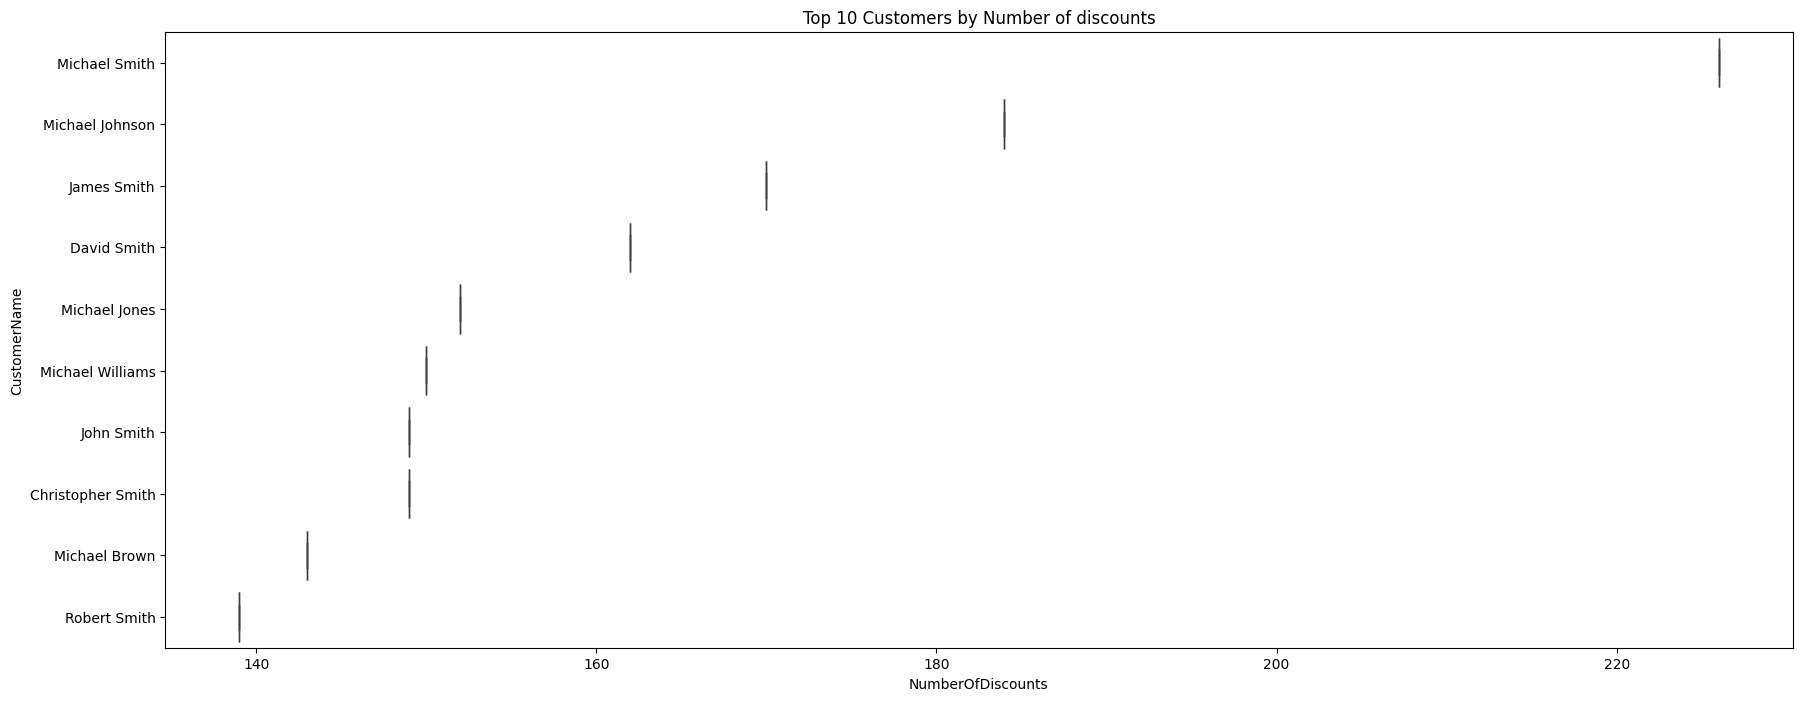

In [76]:
plt.figure(figsize=(21, 8))
sns.boxplot(x= "NumberOfDiscounts", y= "CustomerName", data = Top10)
plt.title("Top 10 Customers by Number of discounts")

In [77]:
PromotionsApplied = retail.groupby(['CustomerName', 'Promotion'], as_index = False).agg(NumberOfPromotions = ('TransactionID', 'count'))
PromotionsApplied = PromotionsApplied.sort_values(by = ['NumberOfPromotions'], ascending =False)
PromotionsApplied= PromotionsApplied.drop(PromotionsApplied[PromotionsApplied['Promotion']== "NaN"].index)
PromotionsApplied

,CustomerName,Promotion,NumberOfPromotions
231581,Michael Smith,BOGO (Buy One Get One),158
231582,Michael Smith,Discount on Selected Items,135
230708,Michael Johnson,BOGO (Buy One Get One),119
138029,James Smith,BOGO (Buy One Get One),116
231843,Michael Williams,Discount on Selected Items,113
...,...,...,...
132459,Isabella Carrillo,BOGO (Buy One Get One),1
132460,Isabella Carter,Discount on Selected Items,1
132461,Isabella Christian,Discount on Selected Items,1
132462,Isabella Cisneros,Discount on Selected Items,1


In [78]:
TotalPromotions = PromotionsApplied.groupby(['CustomerName'], as_index = False).agg(NumberOfPromotions = ('NumberOfPromotions', 'sum'))
TotalPromotions = TotalPromotions.sort_values(by = ['NumberOfPromotions'], ascending =False)
TotalPromotions

,CustomerName,NumberOfPromotions
176889,Michael Smith,293
176373,Michael Johnson,230
107259,James Smith,219
177041,Michael Williams,206
123805,John Smith,197
...,...,...
152104,Laura Bray,1
59658,Dakota Montgomery,1
59657,Dakota Mitchell,1
59656,Dakota Mills,1


In [79]:
Top10 = TotalPromotions.head(10)
Top10

,CustomerName,NumberOfPromotions
176889,Michael Smith,293
176373,Michael Johnson,230
107259,James Smith,219
177041,Michael Williams,206
123805,John Smith,197
51298,Christopher Smith,197
65351,David Smith,194
176379,Michael Jones,194
115142,Jennifer Smith,185
175916,Michael Brown,178


Text(0.5, 1.0, 'Top 10 Customers by Number of Promotions')

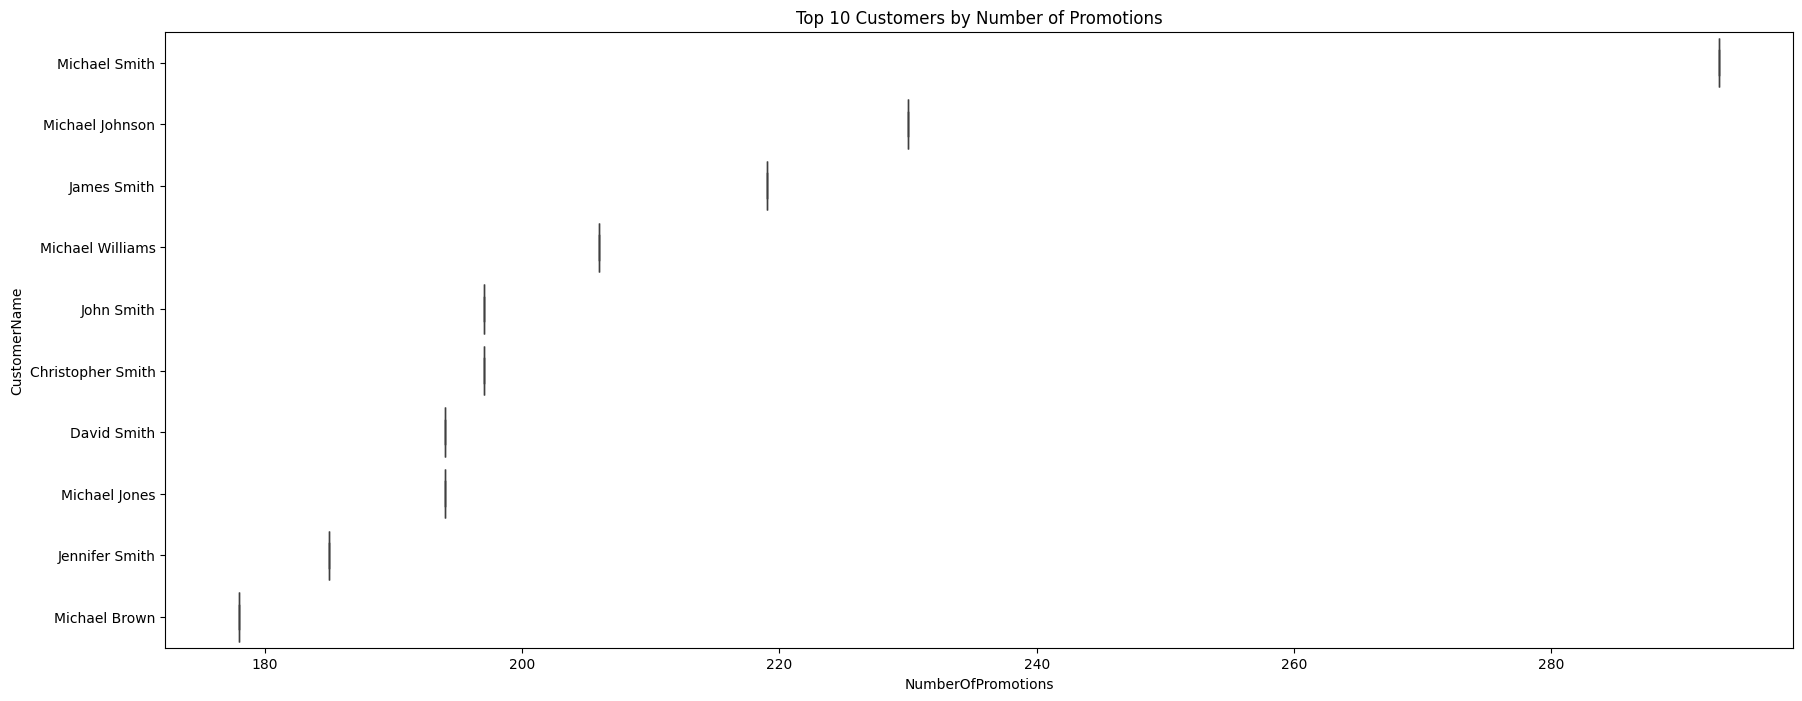

In [80]:
plt.figure(figsize=(21, 8))
sns.boxplot(x= "NumberOfPromotions", y= "CustomerName", data = Top10)
plt.title("Top 10 Customers by Number of Promotions")

In [81]:
SalesByCategory = retail.groupby(['CustomerCategory'], as_index = False).agg(TotalSales = ('TotalCost', 'sum'))
SalesByCategory = SalesByCategory.sort_values(by = ['TotalSales'], ascending =False)
SalesByCategory

,CustomerCategory,TotalSales
6,Young-Adult,11603133.71
0,Homemaker,10983741.58
4,Student,9279727.81
5,Teenager,8005281.42
2,Professional,6790234.77
1,Middle-aged,5242774.77
3,Senior Citizen,550326.34


Text(0.5, 1.0, 'Total Sales by Customer Category')

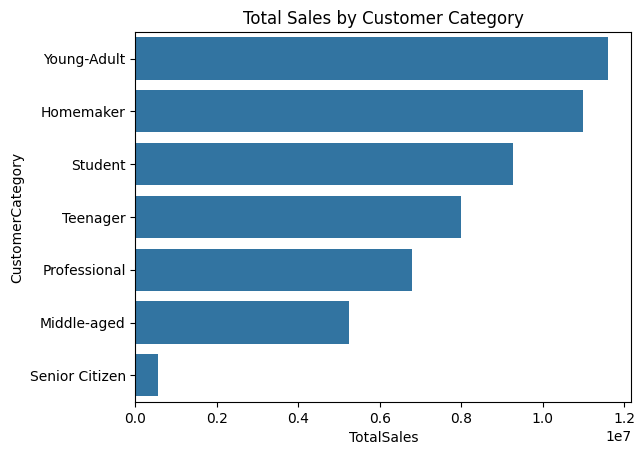

In [82]:
sns.barplot(data= SalesByCategory, x= 'TotalSales', y= 'CustomerCategory')
plt.title("Total Sales by Customer Category")

In [83]:
VisitsByCategory = retail.groupby(['CustomerCategory'], as_index = False).agg(TotalVisits = ('TransactionID', 'count'))
VisitsByCategory = VisitsByCategory.sort_values(by = ['TotalVisits'], ascending =False)
VisitsByCategory

,CustomerCategory,TotalVisits
6,Young-Adult,221090
0,Homemaker,209748
4,Student,176819
5,Teenager,152635
2,Professional,129474
1,Middle-aged,99742
3,Senior Citizen,10492


In [84]:
MonthlyVisitsByCategory = retail.groupby(['CustomerCategory', "Month"], as_index = False).agg(TotalVisits = ('TransactionID', 'count'))
MonthlyVisitsByCategory = MonthlyVisitsByCategory.sort_values(by = ['TotalVisits'], ascending =False)
MonthlyVisitsByCategory

,CustomerCategory,Month,TotalVisits
79,Young-Adult,March,21643
76,Young-Adult,January,21459
72,Young-Adult,April,20633
7,Homemaker,March,20300
4,Homemaker,January,20258
...,...,...,...
42,Senior Citizen,June,814
37,Senior Citizen,August,809
47,Senior Citizen,September,798
45,Senior Citizen,November,798


In [85]:
MonthlyVisitsByCustomerCategory = MonthlyVisitsByCategory.groupby(['CustomerCategory'], as_index = False).agg(NumberOfMonthsVisited = ("Month", 'count'))
MonthlyVisitsByCustomerCategory = MonthlyVisitsByCustomerCategory.sort_values(by = ['NumberOfMonthsVisited'], ascending =False)
MonthlyVisitsByCustomerCategory

,CustomerCategory,NumberOfMonthsVisited
0,Homemaker,12
1,Middle-aged,12
2,Professional,12
3,Senior Citizen,12
4,Student,12
5,Teenager,12
6,Young-Adult,12


Text(0.5, 1.0, 'Total Visits by Customer Category')

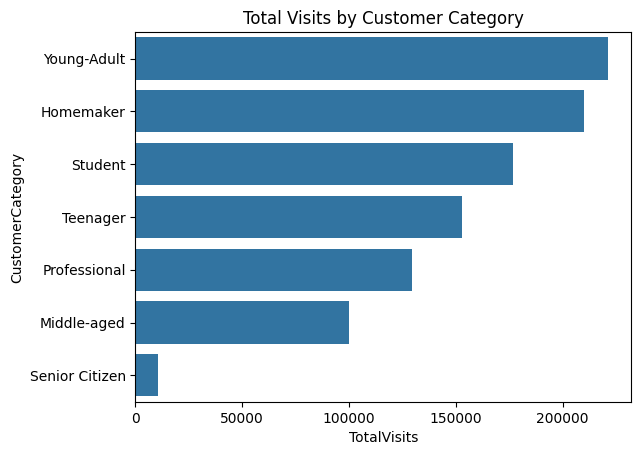

In [86]:
sns.barplot(data= VisitsByCategory, x= 'TotalVisits', y= 'CustomerCategory')
plt.title("Total Visits by Customer Category")

Teenager, Homemaker, Senior Citizen category of people tend to visit the store most number of times and produce top 3 revenues.

In [87]:
Items = retail.groupby(['TotalItems'], as_index = False).agg(TotalPurchase = ('TransactionID', 'count'))
Items = Items.sort_values(by = ['TotalPurchase'], ascending =False)
Items

,TotalItems,TotalPurchase
1,2,100444
4,5,100284
0,1,100097
5,6,100039
6,7,100027
7,8,100004
3,4,99962
2,3,99806
9,10,99782
8,9,99555


Text(0.5, 1.0, 'Total items by total purchase')

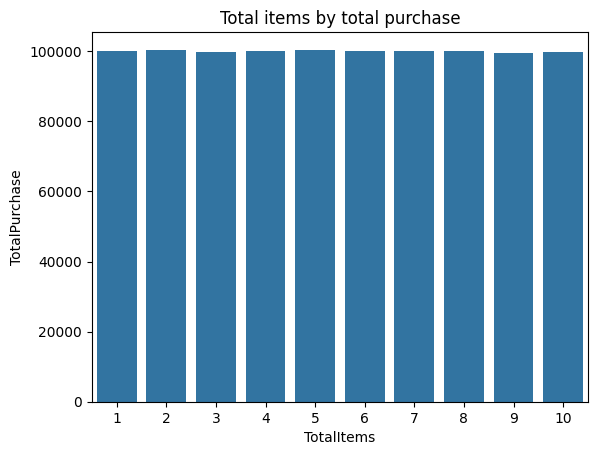

In [88]:
sns.barplot(data=Items, x= 'TotalItems', y= 'TotalPurchase')
plt.title("Total items by total purchase")

In [89]:
SalesByTotalItems = retail.groupby(['TotalItems'], as_index = False).agg(TotalSales = ('TotalCost', 'sum'))
SalesByTotalItems = SalesByTotalItems.sort_values(by = ['TotalSales'], ascending =False)
SalesByTotalItems

,TotalItems,TotalSales
4,5,5275375.51
1,2,5264903.68
3,4,5252626.92
7,8,5249252.82
0,1,5243867.28
5,6,5243197.09
6,7,5241020.10
9,10,5239671.30
2,3,5235116.16
8,9,5210189.54


Text(0.5, 1.0, 'Total items by total sales')

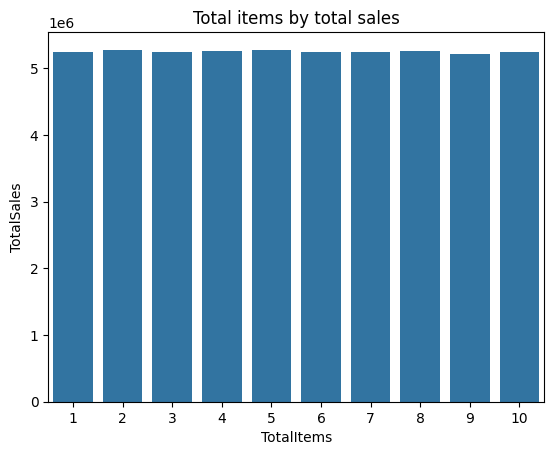

In [90]:
sns.barplot(data=SalesByTotalItems, x= 'TotalItems', y= 'TotalSales')
plt.title("Total items by total sales")

In [91]:
Customer1 = pd.merge(Sales, TotalProductsBought, on= 'CustomerName')
Customer1

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts
0,206954,Michael Smith,23768.53,2516
1,39382,James Smith,18464.04,1794
2,51219,Michael Johnson,18032.17,1908
3,366356,Christopher Smith,17006.64,1606
4,42299,David Smith,16547.27,1708
...,...,...,...,...
329733,170223,Clifford Stone,5.00,5
329734,312768,Jane Grant,5.00,9
329735,246239,Abigail Petersen,5.00,7
329736,91103,Dr. Jennifer Sherman DDS,5.00,6


In [92]:
Customer2 = pd.merge(Customer1, TotalVisit, on= 'CustomerName')
Customer2

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts,NumberOfVisits
0,206954,Michael Smith,23768.53,2516,454
1,39382,James Smith,18464.04,1794,337
2,51219,Michael Johnson,18032.17,1908,341
3,366356,Christopher Smith,17006.64,1606,301
4,42299,David Smith,16547.27,1708,309
...,...,...,...,...,...
329733,170223,Clifford Stone,5.00,5,1
329734,312768,Jane Grant,5.00,9,1
329735,246239,Abigail Petersen,5.00,7,1
329736,91103,Dr. Jennifer Sherman DDS,5.00,6,1


In [93]:
Customer3 = pd.merge(Customer2, YearsVisited, on= 'CustomerName')
Customer3

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts,NumberOfVisits,NumberOfYearsVisits
0,206954,Michael Smith,23768.53,2516,454,5
1,39382,James Smith,18464.04,1794,337,5
2,51219,Michael Johnson,18032.17,1908,341,5
3,366356,Christopher Smith,17006.64,1606,301,5
4,42299,David Smith,16547.27,1708,309,5
...,...,...,...,...,...,...
329733,170223,Clifford Stone,5.00,5,1,1
329734,312768,Jane Grant,5.00,9,1,1
329735,246239,Abigail Petersen,5.00,7,1,1
329736,91103,Dr. Jennifer Sherman DDS,5.00,6,1,1


In [94]:
Customer4 = pd.merge(Customer3, MonthsVisited, on= 'CustomerName')
Customer4

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts,NumberOfVisits,NumberOfYearsVisits,MonthsVisited
0,206954,Michael Smith,23768.53,2516,454,5,12
1,39382,James Smith,18464.04,1794,337,5,12
2,51219,Michael Johnson,18032.17,1908,341,5,12
3,366356,Christopher Smith,17006.64,1606,301,5,12
4,42299,David Smith,16547.27,1708,309,5,12
...,...,...,...,...,...,...,...
329733,170223,Clifford Stone,5.00,5,1,1,1
329734,312768,Jane Grant,5.00,9,1,1,1
329735,246239,Abigail Petersen,5.00,7,1,1,1
329736,91103,Dr. Jennifer Sherman DDS,5.00,6,1,1,1


In [95]:
Customer5 = pd.merge(Customer4, SeasonsVisited, on= 'CustomerName')
Customer5

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts,NumberOfVisits,NumberOfYearsVisits,MonthsVisited,NumberOfSeasonsVisited
0,206954,Michael Smith,23768.53,2516,454,5,12,4
1,39382,James Smith,18464.04,1794,337,5,12,4
2,51219,Michael Johnson,18032.17,1908,341,5,12,4
3,366356,Christopher Smith,17006.64,1606,301,5,12,4
4,42299,David Smith,16547.27,1708,309,5,12,4
...,...,...,...,...,...,...,...,...
329733,170223,Clifford Stone,5.00,5,1,1,1,1
329734,312768,Jane Grant,5.00,9,1,1,1,1
329735,246239,Abigail Petersen,5.00,7,1,1,1,1
329736,91103,Dr. Jennifer Sherman DDS,5.00,6,1,1,1,1


In [96]:
Customer6 = pd.merge(Customer5, CityStoreVisited, on= 'CustomerName')
Customer6

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts,NumberOfVisits,NumberOfYearsVisits,MonthsVisited,NumberOfSeasonsVisited,NumberOfCityStoreVisited
0,206954,Michael Smith,23768.53,2516,454,5,12,4,10
1,39382,James Smith,18464.04,1794,337,5,12,4,10
2,51219,Michael Johnson,18032.17,1908,341,5,12,4,10
3,366356,Christopher Smith,17006.64,1606,301,5,12,4,10
4,42299,David Smith,16547.27,1708,309,5,12,4,10
...,...,...,...,...,...,...,...,...,...
329733,170223,Clifford Stone,5.00,5,1,1,1,1,1
329734,312768,Jane Grant,5.00,9,1,1,1,1,1
329735,246239,Abigail Petersen,5.00,7,1,1,1,1,1
329736,91103,Dr. Jennifer Sherman DDS,5.00,6,1,1,1,1,1


In [97]:
Customer7 = pd.merge(Customer6, DiscountsApplied, on= 'CustomerName', how = 'left')
Customer7

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts,NumberOfVisits,NumberOfYearsVisits,MonthsVisited,NumberOfSeasonsVisited,NumberOfCityStoreVisited,NumberOfDiscounts
0,206954,Michael Smith,23768.53,2516,454,5,12,4,10,226.0
1,39382,James Smith,18464.04,1794,337,5,12,4,10,170.0
2,51219,Michael Johnson,18032.17,1908,341,5,12,4,10,184.0
3,366356,Christopher Smith,17006.64,1606,301,5,12,4,10,149.0
4,42299,David Smith,16547.27,1708,309,5,12,4,10,162.0
...,...,...,...,...,...,...,...,...,...,...
329733,170223,Clifford Stone,5.00,5,1,1,1,1,1,NaN
329734,312768,Jane Grant,5.00,9,1,1,1,1,1,NaN
329735,246239,Abigail Petersen,5.00,7,1,1,1,1,1,1.0
329736,91103,Dr. Jennifer Sherman DDS,5.00,6,1,1,1,1,1,1.0


In [98]:
Customers = pd.merge(Customer7, TotalPromotions, on= 'CustomerName', how ='left')
Customers

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts,NumberOfVisits,NumberOfYearsVisits,MonthsVisited,NumberOfSeasonsVisited,NumberOfCityStoreVisited,NumberOfDiscounts,NumberOfPromotions
0,206954,Michael Smith,23768.53,2516,454,5,12,4,10,226.0,293.0
1,39382,James Smith,18464.04,1794,337,5,12,4,10,170.0,219.0
2,51219,Michael Johnson,18032.17,1908,341,5,12,4,10,184.0,230.0
3,366356,Christopher Smith,17006.64,1606,301,5,12,4,10,149.0,197.0
4,42299,David Smith,16547.27,1708,309,5,12,4,10,162.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...
329733,170223,Clifford Stone,5.00,5,1,1,1,1,1,NaN,1.0
329734,312768,Jane Grant,5.00,9,1,1,1,1,1,NaN,1.0
329735,246239,Abigail Petersen,5.00,7,1,1,1,1,1,1.0,1.0
329736,91103,Dr. Jennifer Sherman DDS,5.00,6,1,1,1,1,1,1.0,NaN


In [99]:
Customers

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts,NumberOfVisits,NumberOfYearsVisits,MonthsVisited,NumberOfSeasonsVisited,NumberOfCityStoreVisited,NumberOfDiscounts,NumberOfPromotions
0,206954,Michael Smith,23768.53,2516,454,5,12,4,10,226.0,293.0
1,39382,James Smith,18464.04,1794,337,5,12,4,10,170.0,219.0
2,51219,Michael Johnson,18032.17,1908,341,5,12,4,10,184.0,230.0
3,366356,Christopher Smith,17006.64,1606,301,5,12,4,10,149.0,197.0
4,42299,David Smith,16547.27,1708,309,5,12,4,10,162.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...
329733,170223,Clifford Stone,5.00,5,1,1,1,1,1,NaN,1.0
329734,312768,Jane Grant,5.00,9,1,1,1,1,1,NaN,1.0
329735,246239,Abigail Petersen,5.00,7,1,1,1,1,1,1.0,1.0
329736,91103,Dr. Jennifer Sherman DDS,5.00,6,1,1,1,1,1,1.0,NaN


In [100]:
TotalUniqueCustomers = Customers.to_csv('Customer.csv', sep = ',', index = False, header= True)

In [101]:
CustomerA = Customers.drop(Customers[Customers['MonthsVisited'] <= 8 ].index)
CustomerA

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts,NumberOfVisits,NumberOfYearsVisits,MonthsVisited,NumberOfSeasonsVisited,NumberOfCityStoreVisited,NumberOfDiscounts,NumberOfPromotions
0,206954,Michael Smith,23768.53,2516,454,5,12,4,10,226.0,293.0
1,39382,James Smith,18464.04,1794,337,5,12,4,10,170.0,219.0
2,51219,Michael Johnson,18032.17,1908,341,5,12,4,10,184.0,230.0
3,366356,Christopher Smith,17006.64,1606,301,5,12,4,10,149.0,197.0
4,42299,David Smith,16547.27,1708,309,5,12,4,10,162.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...
32393,82564,Paula Clark,325.34,54,10,3,9,4,7,6.0,4.0
33513,76984,Amber Simmons,317.50,42,9,5,9,3,6,4.0,5.0
35225,170544,Jeremy Rivera,305.57,62,11,4,9,4,8,1.0,8.0
35784,348217,Brian Austin,302.19,62,9,5,9,3,8,4.0,5.0


In [102]:
CustomerA['TotalAmountSpend'].describe()

count     9238.000000
mean      1485.234207
std       1312.653588
min        270.580000
25%        814.932500
50%       1095.985000
75%       1645.930000
max      23768.530000
Name: TotalAmountSpend, dtype: float64

In [103]:
CustomerA['TotalAmountSpend'].sum()

13720593.600000001

In [104]:
CA = CustomerA.to_csv('CustomerA.csv', sep = ',', index = False, header= True)

In [105]:
CustomerB = Customers.drop(Customers[Customers['MonthsVisited']>8].index)
CustomerB = CustomerB.drop(Customers[Customers['MonthsVisited']<=4].index)
CustomerB

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts,NumberOfVisits,NumberOfYearsVisits,MonthsVisited,NumberOfSeasonsVisited,NumberOfCityStoreVisited,NumberOfDiscounts,NumberOfPromotions
1846,300464,Craig Williams,1854.18,168,29,5,8,4,9,18.0,20.0
1947,210965,Sarah Baker,1798.55,166,32,5,8,4,10,10.0,23.0
2363,343262,Diana Jones,1627.72,135,25,5,8,4,10,18.0,19.0
2719,127747,Cindy Johnson,1503.60,162,28,4,8,4,10,14.0,16.0
2837,81357,Michael Carlson,1466.07,140,26,5,8,4,8,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
122257,352892,Alex Lopez,100.11,40,5,3,5,2,4,3.0,4.0
131546,217467,Molly Coleman,96.45,40,5,3,5,3,4,2.0,4.0
154762,49890,Douglas Aguilar,87.16,31,5,3,5,3,5,4.0,4.0
159220,363397,Douglas Daniel,85.31,37,5,3,5,2,3,2.0,3.0


In [106]:
CustomerB['TotalAmountSpend'].describe()

count    28277.000000
mean       431.308466
std        169.563249
min         83.290000
25%        310.190000
50%        398.750000
75%        518.900000
max       1854.180000
Name: TotalAmountSpend, dtype: float64

In [107]:
CustomerB['NumberOfVisits'].describe()

count    28277.000000
mean         8.227605
std          2.862081
min          5.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         32.000000
Name: NumberOfVisits, dtype: float64

In [108]:
CustomerB['TotalAmountSpend'].sum()

12196109.48

In [109]:
CB = CustomerB.to_csv('CustomerB.csv', sep = ',', index = False, header= True)

In [110]:
CustomerC = Customers.drop(Customers[Customers['MonthsVisited']>4].index)
CustomerC

,CustomerID,CustomerName,TotalAmountSpend,TotalProducts,NumberOfVisits,NumberOfYearsVisits,MonthsVisited,NumberOfSeasonsVisited,NumberOfCityStoreVisited,NumberOfDiscounts,NumberOfPromotions
9278,145647,Kristin Thompson,732.61,79,12,5,4,4,7,5.0,6.0
9391,175299,Toni Johnson,727.35,43,9,5,4,4,7,8.0,7.0
10120,111843,Travis Walker,694.27,66,9,4,4,4,6,3.0,5.0
10528,398158,William Rios,676.57,44,10,5,4,4,6,6.0,7.0
10698,182827,Joshua Wheeler,670.10,47,10,5,4,4,6,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
329733,170223,Clifford Stone,5.00,5,1,1,1,1,1,NaN,1.0
329734,312768,Jane Grant,5.00,9,1,1,1,1,1,NaN,1.0
329735,246239,Abigail Petersen,5.00,7,1,1,1,1,1,1.0,1.0
329736,91103,Dr. Jennifer Sherman DDS,5.00,6,1,1,1,1,1,1.0,NaN


In [111]:
CustomerC['TotalAmountSpend'].describe()

count    292223.000000
mean         90.815977
std          70.046088
min           5.000000
25%          42.150000
50%          75.170000
75%         115.435000
max         732.610000
Name: TotalAmountSpend, dtype: float64

In [112]:
CustomerC['NumberOfVisits'].describe()

count    292223.000000
mean          1.731917
std           1.142055
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          12.000000
Name: NumberOfVisits, dtype: float64

In [113]:
CustomerA['TotalAmountSpend'].sum()

13720593.600000001

In [114]:
CC = CustomerC.to_csv('CustomerC.csv', sep = ',', index = False, header= True)

The customers are segmented based on how many months in a year they visit a store.
CustomerA - The customers belong to this category purchases products atleast 8 months a year and produce the second highest revenue. 
CustomerB - The customers belong to this category purchases products between 4 to 8 months a year and produce revenue.
CustomerC -The customers belong to this category purchases products atmost 4 months a year and produce the highest revenue. 

 